# Sage Shaw

### ME 571 - Spring 2018

# HW 2 - Problem 3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg
import timeit

In [69]:
%%bash
mpicc demo_util.c hw3p1_sage.c -o hw3p1_sage -lm
mpirun -n 8 ./hw3p1_sage -p 3 --itermax 20000 --tol 1.0e-10 > results.csv

Process is interrupted.


In [70]:
A = np.genfromtxt('results.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

ValueError: cannot convert float NaN to integer

iterations: 3474
residual: 9.95842e-11
nodes: 34


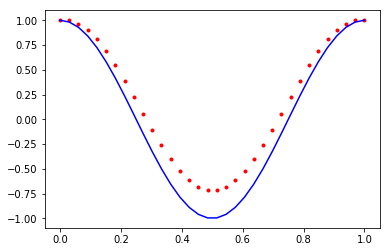

In [34]:
A = np.genfromtxt('results.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

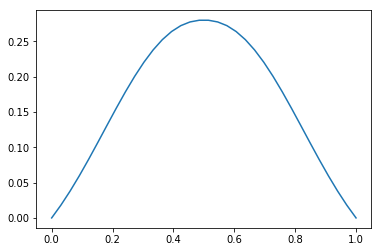

In [35]:
plt.plot(x, A - np.cos(2*np.pi*x))

iterations: 3157
residual: 9.95927e-11
nodes: 34


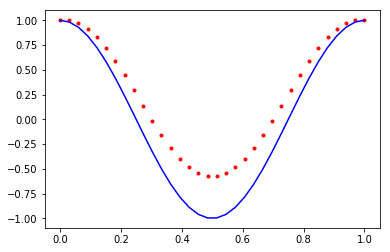

In [37]:
A = np.genfromtxt('results.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

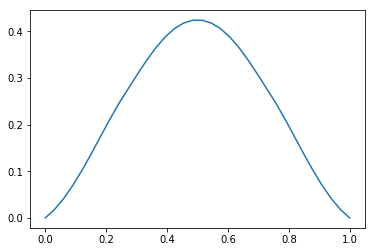

In [38]:
plt.plot(x, A - np.cos(2*np.pi*x))